In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA LOADING & INITIAL INSPECTION

In [3]:
#LOADING DATA - AuctionData.xlsx
df = pd.read_excel('../data/AuctionData.xlsx')

In [4]:
#INSEPCTING FIRST FEW ROOWS OF DATA
print(df.head())

                        Catalogue_No Auction_Date           Plant Plant_Code  \
0    IOCL/1100/1171/2021-2022/69/956   2022-02-17  Tikri Kalan BP       1171   
1    IOCL/1100/1171/2021-2022/70/957   2022-02-21  Tikri Kalan BP       1171   
2  IOCL/1100/1171/2022-2023/105/1488   2022-09-02  Tikri Kalan BP       1171   
3  IOCL/1100/1171/2022-2023/123/1789   2022-12-08  Tikri Kalan BP       1171   
4  IOCL/1100/1171/2022-2023/123/1789   2022-12-08  Tikri Kalan BP       1171   

   SCode                 State                             H1_Buyer_Name  \
0   1100  Delhi & Haryana SO                           GAGAN ENTERPRISES   
1   1100  Delhi & Haryana SO    BANSAL ALLOYS AND METALS PRIVATE LIMITED   
2   1100  Delhi & Haryana SO                              HARSHIT METALS   
3   1100  Delhi & Haryana SO    BANSAL ALLOYS AND METALS PRIVATE LIMITED   
4   1100  Delhi & Haryana SO    BANSAL ALLOYS AND METALS PRIVATE LIMITED   

   Proposed_RP  Quantity AuctUOM  Last_Bid_Price   total_amt M

In [5]:
#CHECKING THE SHAPE
print("Shape: ", df.shape)

Shape:  (3422, 14)


In [6]:
#CHECKING DATATYPES
print(df.dtypes)

Catalogue_No                  object
Auction_Date          datetime64[ns]
Plant                         object
Plant_Code                    object
SCode                          int64
State                         object
H1_Buyer_Name                 object
Proposed_RP                  float64
Quantity                     float64
AuctUOM                       object
Last_Bid_Price                 int64
total_amt                    float64
Material_Code                 object
ProductDescription            object
dtype: object


In [7]:
#CHECKING FOR MISSING VALUES
df.isnull().sum()

Catalogue_No          0
Auction_Date          0
Plant                 0
Plant_Code            0
SCode                 0
State                 0
H1_Buyer_Name         0
Proposed_RP           0
Quantity              0
AuctUOM               0
Last_Bid_Price        0
total_amt             0
Material_Code         0
ProductDescription    0
dtype: int64

In [8]:
print(df.describe())

                        Auction_Date        SCode    Proposed_RP     Quantity  \
count                           3422  3422.000000    3422.000000  3422.000000   
mean   2023-10-16 22:53:05.505552128  3001.431911  152915.098609    52.643196   
min              2022-02-01 00:00:00  1100.000000   25000.000000     0.008000   
25%              2023-01-12 00:00:00  1500.000000   35366.670000     8.006500   
50%              2023-11-08 00:00:00  3100.000000   40000.000000    19.095000   
75%              2024-07-30 00:00:00  4100.000000  184958.335000    77.109000   
max              2025-06-19 00:00:00  7500.000000  554000.000000   435.395000   
std                              NaN  1581.198265  181449.796367    64.791640   

       Last_Bid_Price     total_amt  
count     3422.000000  3.422000e+03  
mean    153395.295149  5.640650e+06  
min      20100.000000  4.453280e+05  
25%      34700.000000  2.547764e+06  
50%      39300.000000  4.995919e+06  
75%     188875.000000  8.078826e+06  
max 

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Catalogue_No        3422 non-null   object        
 1   Auction_Date        3422 non-null   datetime64[ns]
 2   Plant               3422 non-null   object        
 3   Plant_Code          3422 non-null   object        
 4   SCode               3422 non-null   int64         
 5   State               3422 non-null   object        
 6   H1_Buyer_Name       3422 non-null   object        
 7   Proposed_RP         3422 non-null   float64       
 8   Quantity            3422 non-null   float64       
 9   AuctUOM             3422 non-null   object        
 10  Last_Bid_Price      3422 non-null   int64         
 11  total_amt           3422 non-null   float64       
 12  Material_Code       3422 non-null   object        
 13  ProductDescription  3422 non-null   object      

## DATA CLEANING

In [10]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace('__', '_')
df.columns = df.columns.str.replace('__', '_')

In [11]:
#CHECKING FOR DUPLICATES
df.duplicated().sum()

np.int64(0)

In [12]:
#CHECKING FOR OUTLIERS - STATISTICAL METHODS
#Interquartile Range (IQR)
num_cols = ['proposed_rp', 'quantity', 'last_bid_price',]
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {outliers.shape[0]} outliers")
total_rows = df.shape[0]
print(f"proposed_rp: {803/total_rows:.2%} outliers")
print(f"quantity: {283/total_rows:.2%} outliers")
print(f"last_bid_price: {788/total_rows:.2%} outliers")

proposed_rp: 803 outliers
quantity: 283 outliers
last_bid_price: 788 outliers
proposed_rp: 23.47% outliers
quantity: 8.27% outliers
last_bid_price: 23.03% outliers


In [13]:
#GROUPING PRODUCTS INTO CATEGORIES- CYLINDERS, VALVES, REMAINING
#  Required items: Cylinders, valves
cylinders = [x.lower().strip() for x in [
    '14.2 Kg', '19 Kg', '5 Kg', '47.5 Kg', '5 Kg FTLR', '5 Kg ND',
    '47.5 Kg LOTV', '19 Kg SC', '19 Kg NCut', '5 Kg FTL', '14.2 Kg OMC'
]]
valves = [x.lower().strip() for x in ['SC Valve', 'LIQUID OFFTAKE VALVE']]
remaining = [x.lower().strip() for x in ['PR']]

def map_product_type(desc):
    desc = str(desc).lower().strip()
    if desc in cylinders:
        return 'cylinders'
    elif desc in valves:
        return 'valves'
    elif desc in remaining:
        return 'remaining'
    else:
        return 'unknown'

df['product_group'] = df['productdescription'].apply(map_product_type)
print(df['product_group'].value_counts())

product_group
cylinders    2277
valves        805
remaining     340
Name: count, dtype: int64


In [14]:
print(df['product_group'].unique())

['valves' 'cylinders' 'remaining']


In [15]:
#Keeping only required items
df = df[df['product_group'].isin(['cylinders', 'valves'])]

In [16]:
# List of numerical columns to check
num_cols = ['proposed_rp', 'quantity', 'last_bid_price']


for group in df['product_group'].unique():
    group_df = df[df['product_group'] == group]
    print(f"\nGroup: {group} (n={group_df.shape[0]})")
    for col in num_cols:
        Q1 = group_df[col].quantile(0.25)
        Q3 = group_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_count = group_df[(group_df[col] < lower) | (group_df[col] > upper)].shape[0]
        print(f"  {col}: {outlier_count} outliers ({outlier_count/group_df.shape[0]:.2%})")


Group: valves (n=805)
  proposed_rp: 0 outliers (0.00%)
  quantity: 1 outliers (0.12%)
  last_bid_price: 0 outliers (0.00%)

Group: cylinders (n=2277)
  proposed_rp: 15 outliers (0.66%)
  quantity: 14 outliers (0.61%)
  last_bid_price: 38 outliers (1.67%)


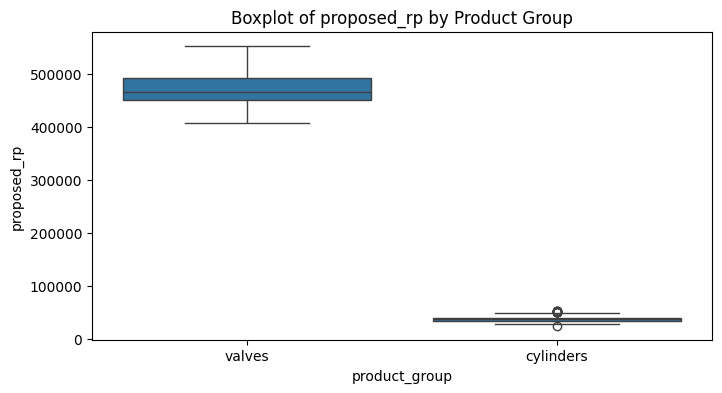

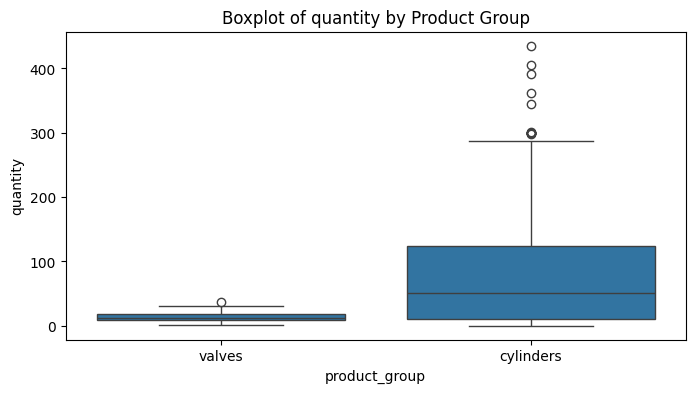

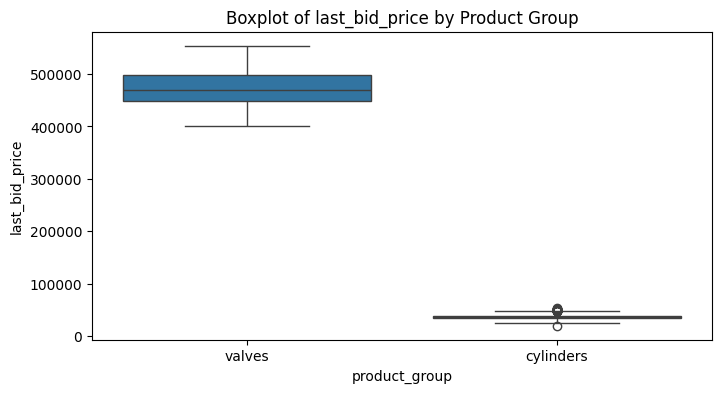

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='product_group', y=col, data=df)
    plt.title(f'Boxplot of {col} by Product Group')
    plt.show()

## FEATURE ENGINEERING

Extracting year, month and day from auction_date column and creating year_month_df colum as either string or datetimens[64]

In [18]:
# EXTRACTING YEAR, MONTH, DAY FROM AUCTION_DATE
df['auction_date'] = pd.to_datetime(df['auction_date'])
df['year'] = df['auction_date'].dt.year
df['month'] = df['auction_date'].dt.month
df['day'] = df['auction_date'].dt.day
df['year_month'] = df['auction_date'].dt.to_period('M').astype(str)
df['year_month_dt'] = pd.to_datetime(df['auction_date'])



In [19]:
df['total_amt_calc'] = df['last_bid_price'] * df['quantity']  


Product Group: valves


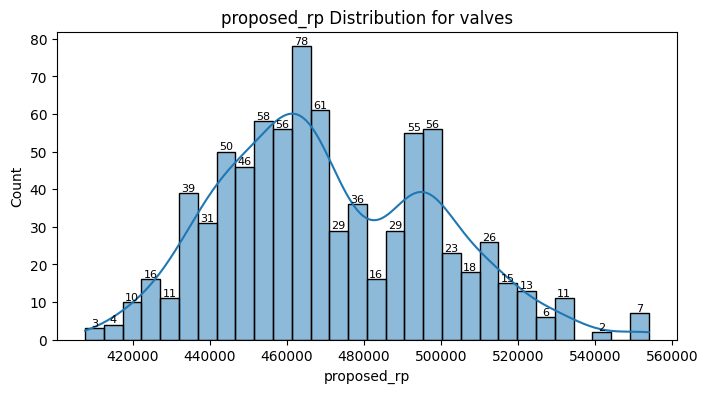

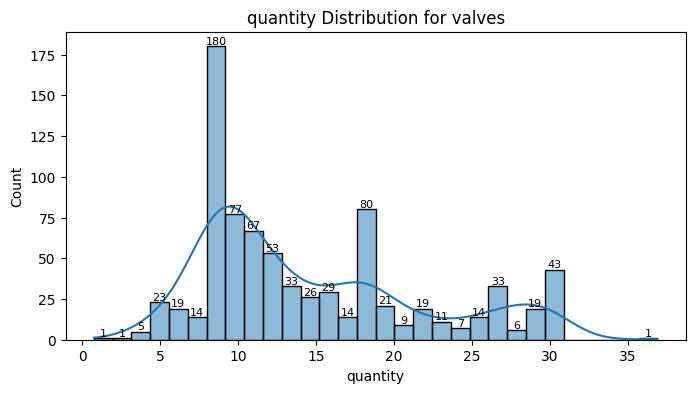

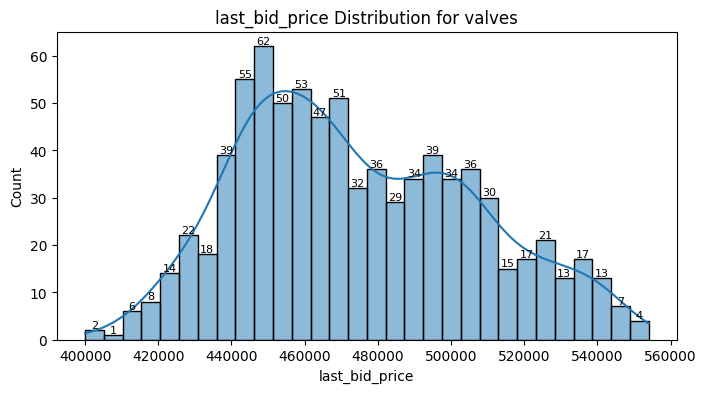

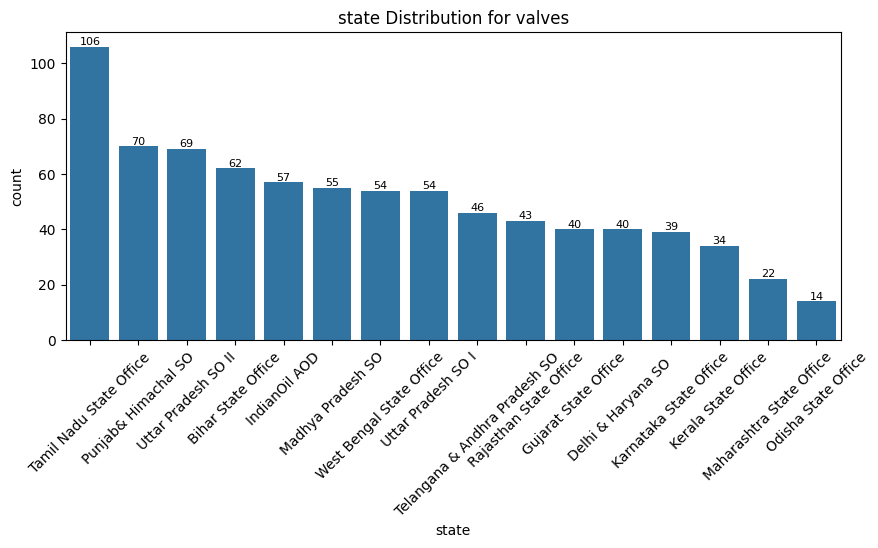


Product Group: cylinders


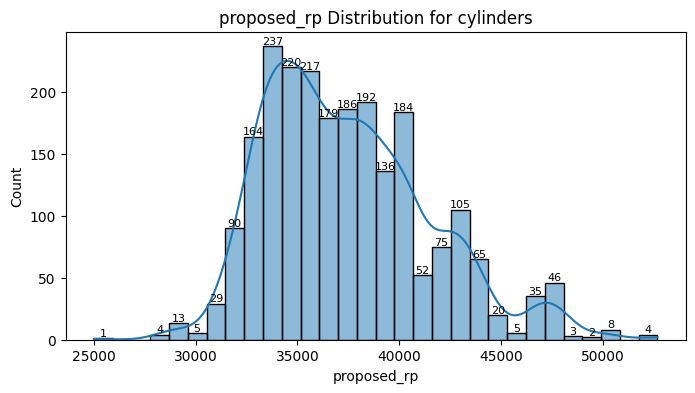

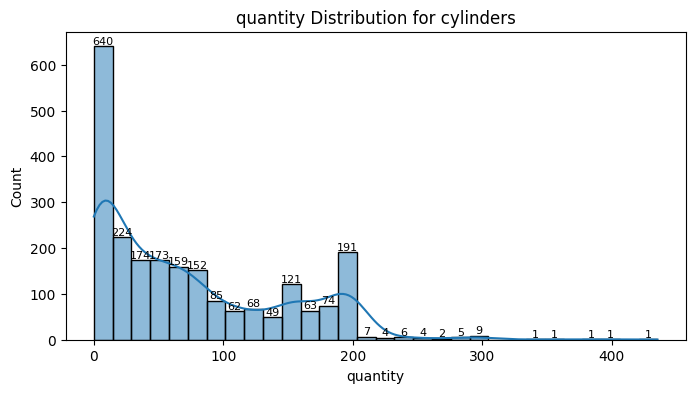

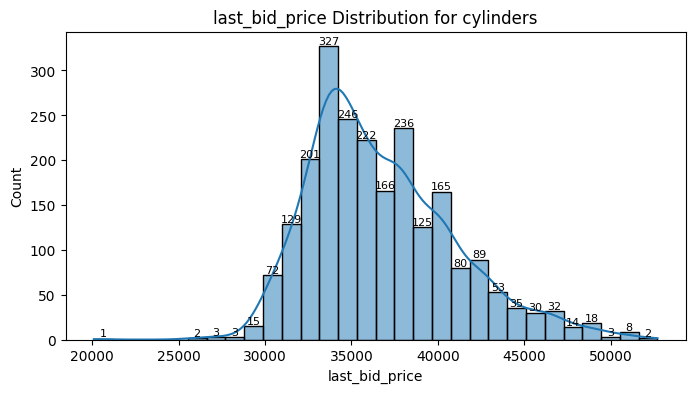

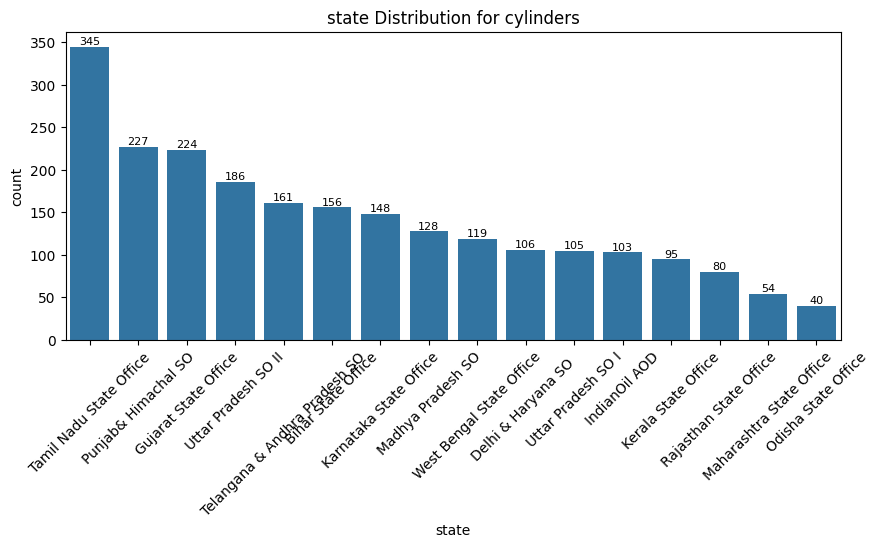

In [20]:
#UNIVARIATE ANALYSIS

num_cols = ['proposed_rp', 'quantity', 'last_bid_price']
cat_cols = ['state']

for group in df['product_group'].unique():
    group_df = df[df['product_group'] == group]
    print(f"\nProduct Group: {group}")

    # Histograms for numerical features
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        ax = sns.histplot(group_df[col], bins=30, kde=True)
        plt.title(f'{col} Distribution for {group}')
        # Annotating bar heights
        for p in ax.patches:
            height = int(p.get_height())
            if height > 0:
                ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=8, color='black', rotation=0)
        plt.show()

    # Bar plots for categorical features
    for col in cat_cols:
        plt.figure(figsize=(10, 4))
        ax = sns.countplot(x=col, data=group_df, order=group_df[col].value_counts().index)
        plt.title(f'{col} Distribution for {group}')
        # Annotating bar heights
        for p in ax.patches:
            height = int(p.get_height())
            ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black', rotation=0)
        plt.xticks(rotation=45)
        plt.show()

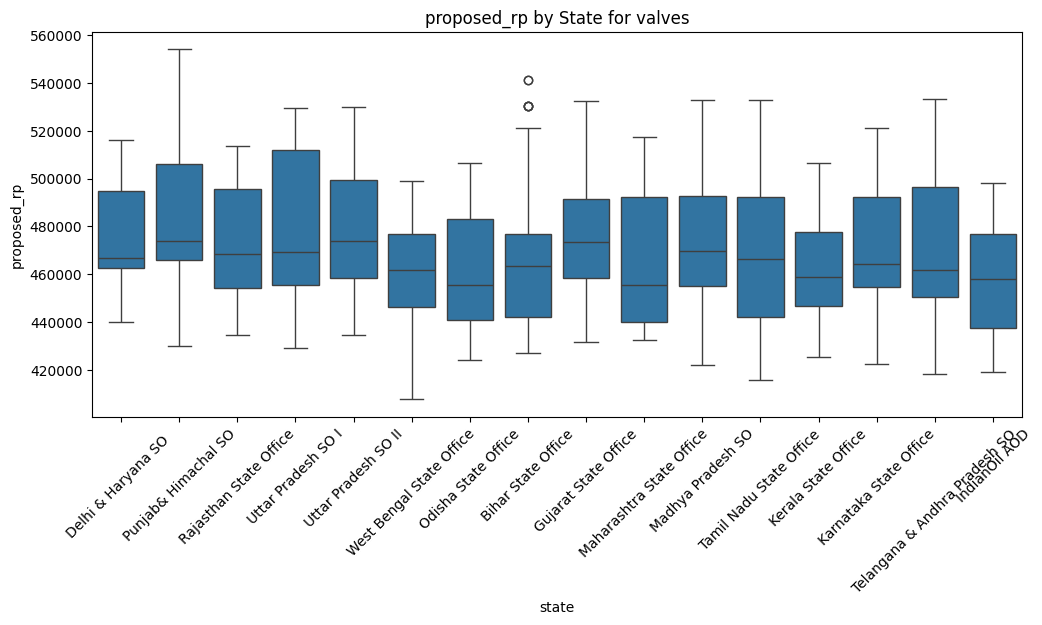

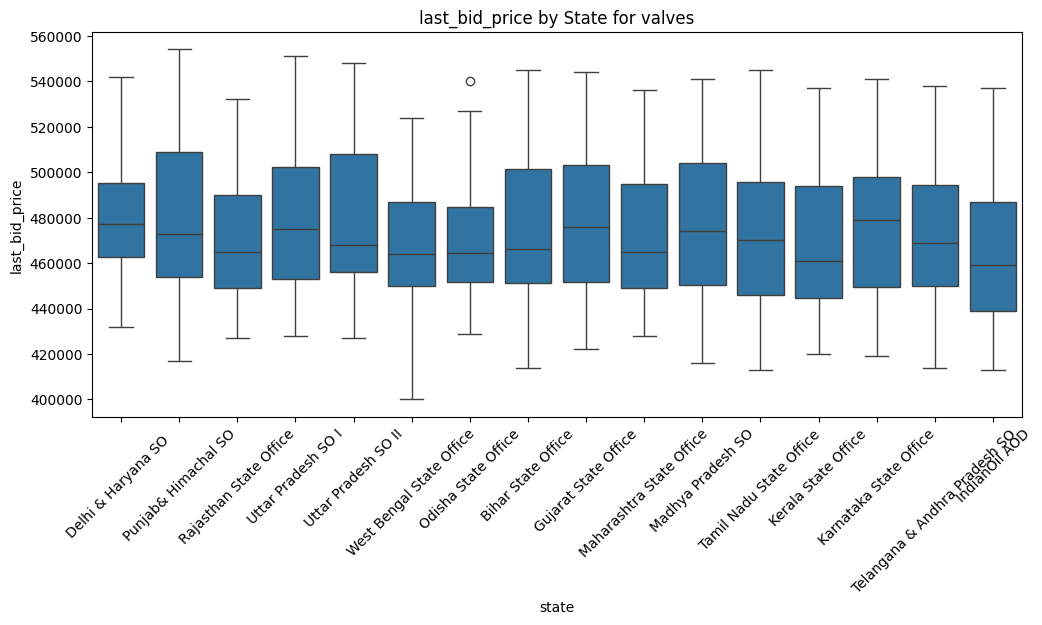

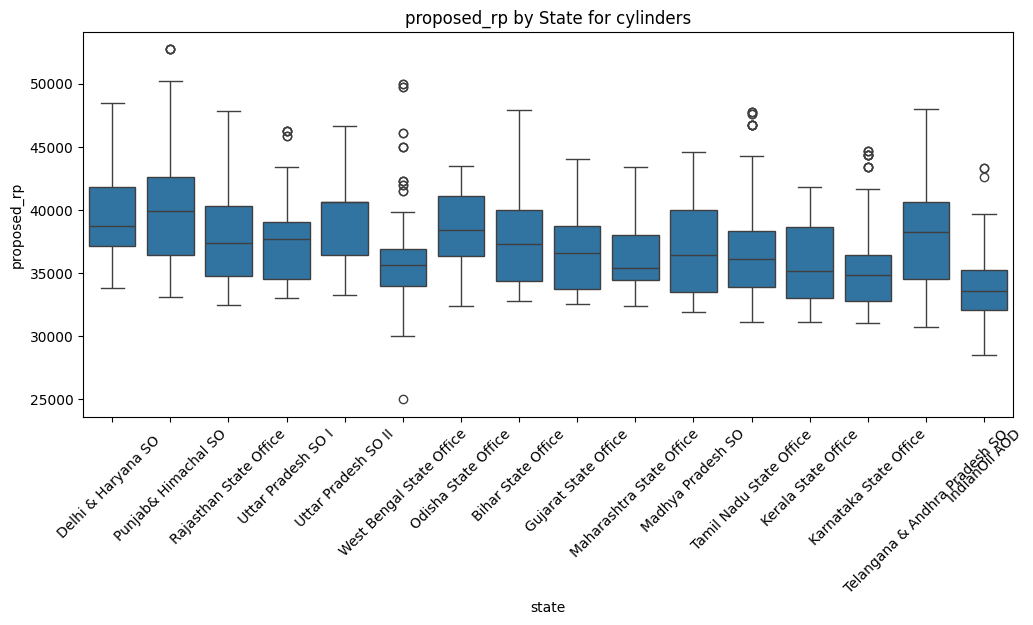

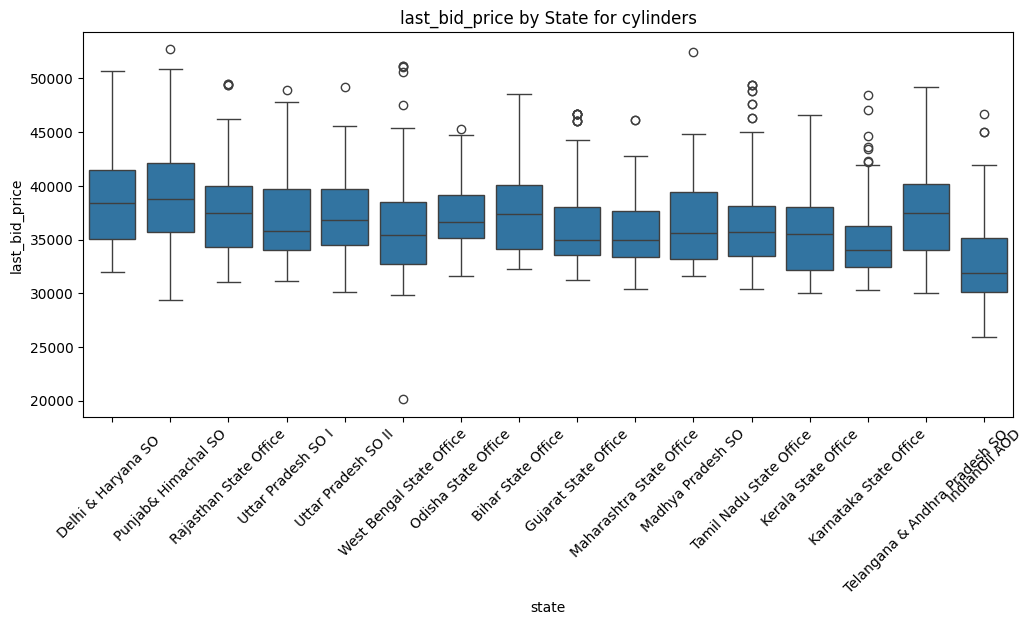


Aggregations for valves:
                                    proposed_rp                    \
                                           mean      median count   
year month state                                                    
2022 2     Bihar State Office        461333.335  461333.335     2   
           Delhi & Haryana SO        467000.000  467000.000     2   
           Karnataka State Office    455000.000  455000.000     1   
           Kerala State Office       450333.330  450333.330     1   
           Maharashtra State Office  438333.330  438333.330     1   
...                                         ...         ...   ...   
2025 6     Gujarat State Office      507333.330  507333.330     1   
           Madhya Pradesh SO         520333.330  520333.330     1   
           Tamil Nadu State Office   529333.330  529333.330     1   
           Uttar Pradesh SO I        522333.330  522333.330     1   
           Uttar Pradesh SO II       530000.000  530000.000     2   

       

In [21]:
#BIVARIATE ANALYSIS
# Boxplots: price features by state for each product group
for group in df['product_group'].unique():
    group_df = df[df['product_group'] == group]
    for col in ['proposed_rp', 'last_bid_price']:
        plt.figure(figsize=(12, 5))
        sns.boxplot(x='state', y=col, data=group_df)
        plt.title(f'{col} by State for {group}')
        plt.xticks(rotation=45)
        plt.show()

# Groupby aggregations: mean/median by year, month, state
agg_cols = ['proposed_rp', 'last_bid_price', 'quantity']
for group in df['product_group'].unique():
    group_df = df[df['product_group'] == group]
    print(f"\nAggregations for {group}:")
    print(group_df.groupby(['year', 'month', 'state'])[agg_cols].agg(['mean', 'median', 'count']))

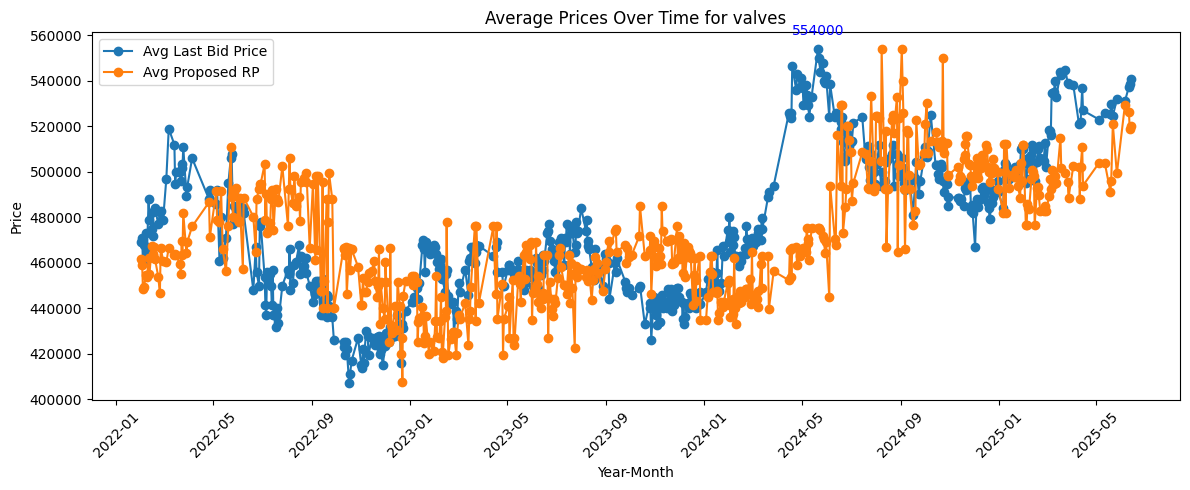

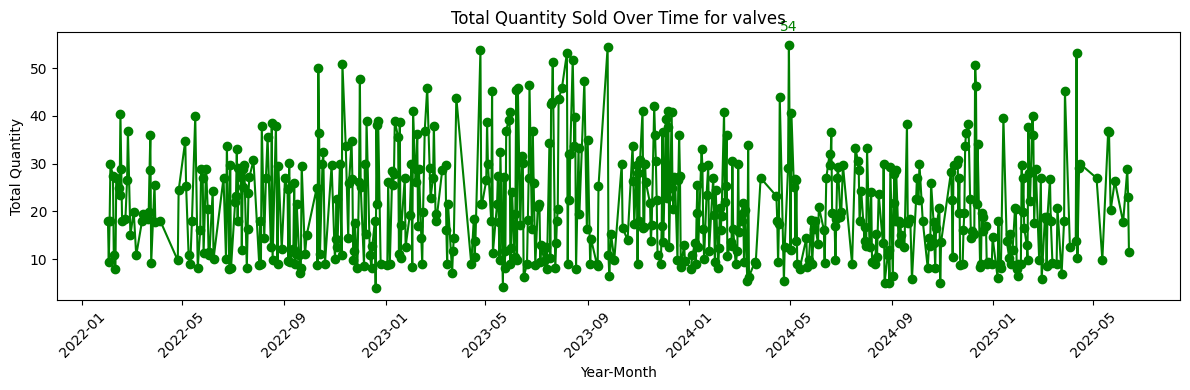

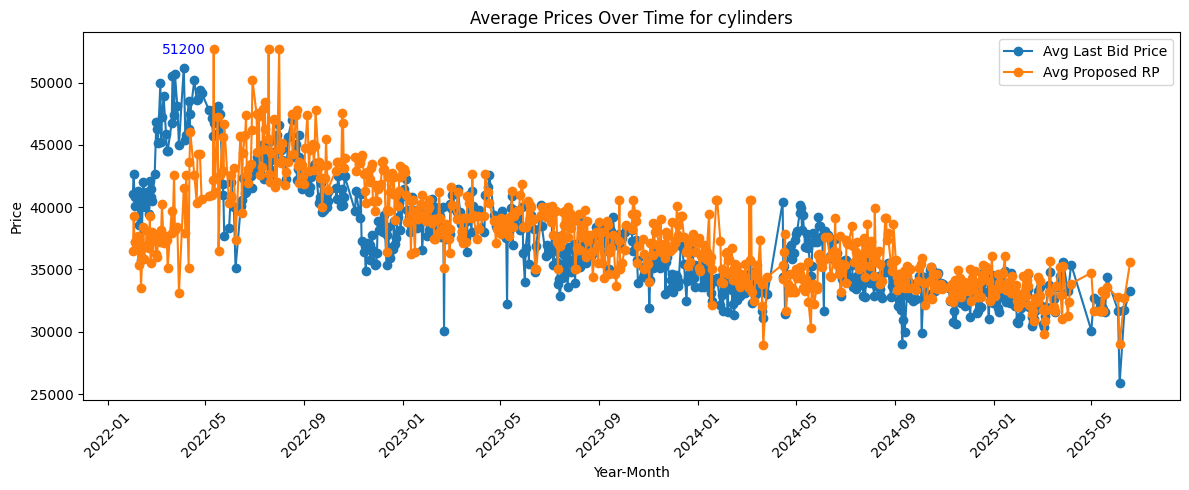

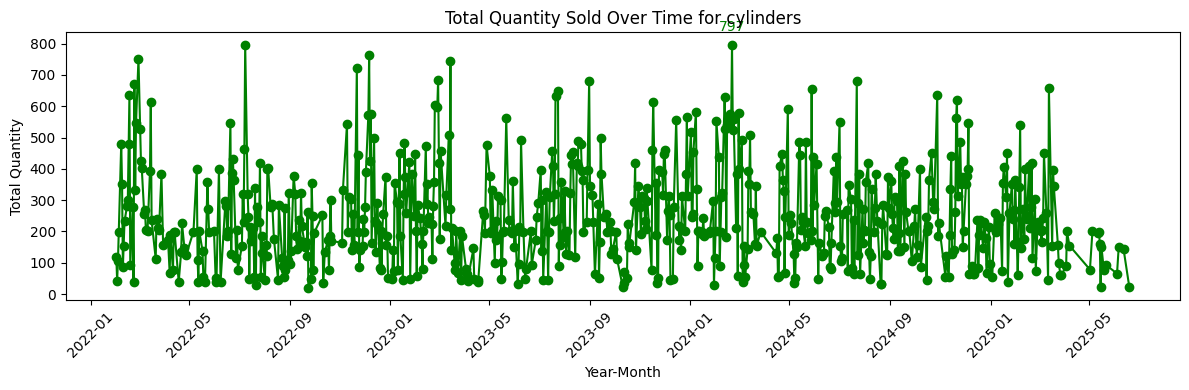

In [22]:
#TIME SERIES VISUALIZATION
# Line plots: average last_bid_price and proposed_rp over time (year_month_dt)
for group in df['product_group'].unique():
    group_df = df[df['product_group'] == group]
    time_agg = group_df.groupby('year_month_dt').agg({
        'last_bid_price': 'mean',
        'proposed_rp': 'mean',
        'quantity': 'sum'
    }).reset_index()

    plt.figure(figsize=(12, 5))
    plt.plot(time_agg['year_month_dt'], time_agg['last_bid_price'], marker='o', label='Avg Last Bid Price')
    plt.plot(time_agg['year_month_dt'], time_agg['proposed_rp'], marker='o', label='Avg Proposed RP')
    plt.title(f'Average Prices Over Time for {group}')
    plt.xlabel('Year-Month')
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.legend()
    # Annotate peak points
    max_idx = time_agg['last_bid_price'].idxmax()
    plt.annotate(f"{time_agg['last_bid_price'][max_idx]:.0f}", 
                 (time_agg['year_month_dt'][max_idx], time_agg['last_bid_price'][max_idx]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='blue')
    plt.tight_layout()
    plt.show()

    # Volume over time
    plt.figure(figsize=(12, 4))
    plt.plot(time_agg['year_month_dt'], time_agg['quantity'], marker='o', color='green')
    plt.title(f'Total Quantity Sold Over Time for {group}')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Quantity')
    plt.xticks(rotation=45)
    # Annotate peak
    max_idx = time_agg['quantity'].idxmax()
    plt.annotate(f"{int(time_agg['quantity'][max_idx])}", 
                 (time_agg['year_month_dt'][max_idx], time_agg['quantity'][max_idx]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='green')
    plt.tight_layout()
    plt.show()

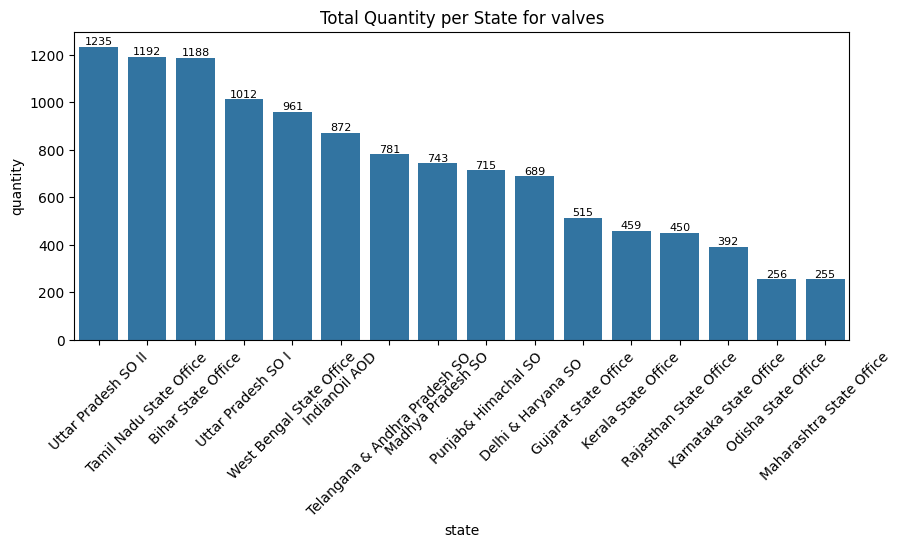

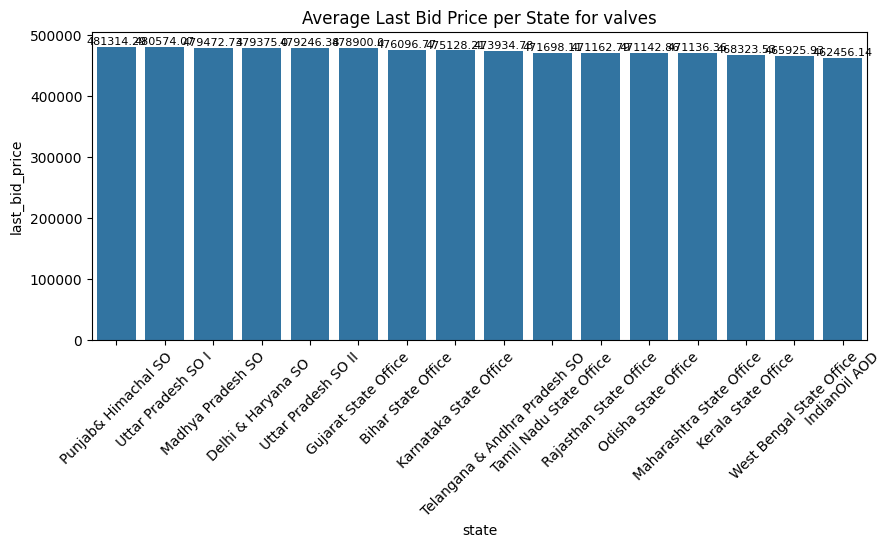

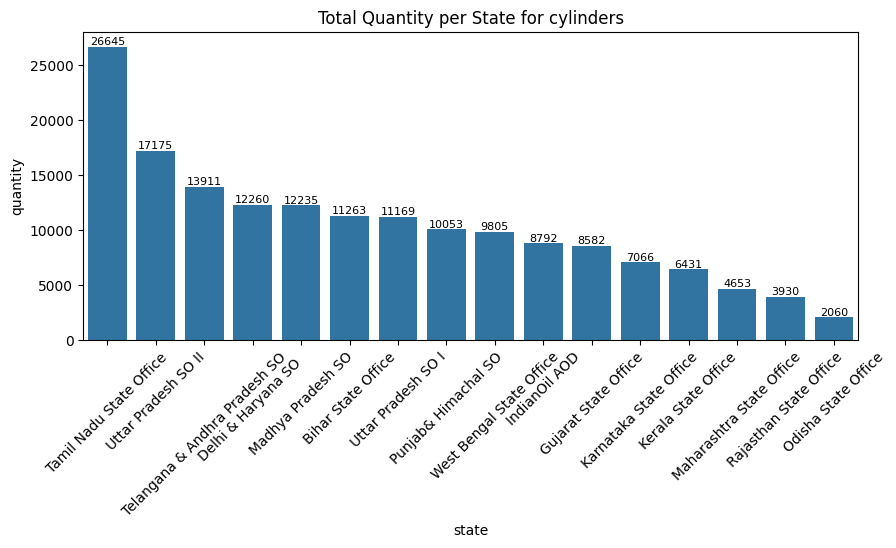

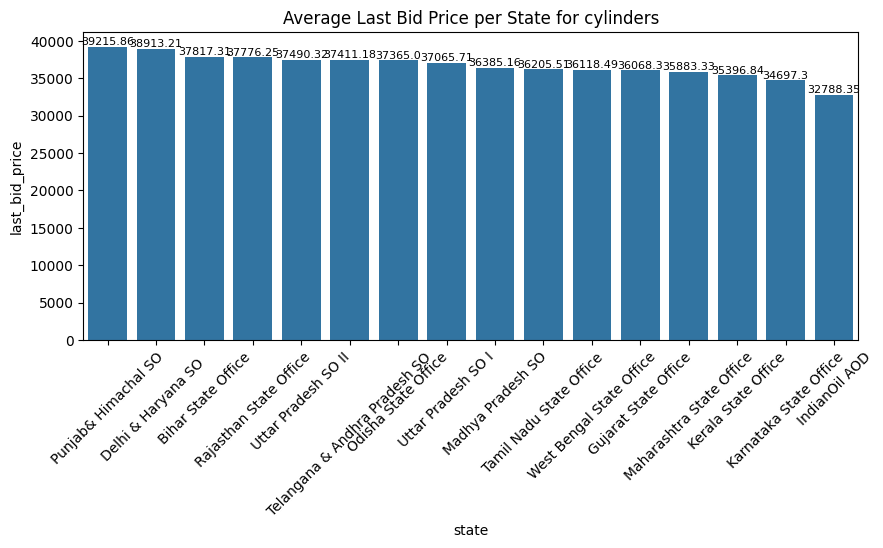

In [23]:
#STATE WISE ANALYSIS
# Bar plots: total quantity and average price per state, for each product group
for group in df['product_group'].unique():
    group_df = df[df['product_group'] == group]
    state_agg = group_df.groupby('state').agg({
        'quantity': 'sum',
        'last_bid_price': 'mean'
    }).reset_index()

    # Total quantity per state
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='state', y='quantity', data=state_agg, order=state_agg.sort_values('quantity', ascending=False)['state'])
    plt.title(f'Total Quantity per State for {group}')
    plt.xticks(rotation=45)
    for p in ax.patches:
        height = int(p.get_height())
        ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, color='black', rotation=0)
    plt.show()

    # Average price per state
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x='state', y='last_bid_price', data=state_agg, order=state_agg.sort_values('last_bid_price', ascending=False)['state'])
    plt.title(f'Average Last Bid Price per State for {group}')
    plt.xticks(rotation=45)
    for p in ax.patches:
        height = round(p.get_height(), 2)
        ax.annotate(str(height), (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=8, color='black', rotation=0)
    plt.show()

## FINDING EXPONENTIALLY WEIGHTED MEAN FOR TRAINING

In [24]:
span = 10

df = df.sort_values(['product_group', 'state', 'auction_date'])
df['ewm_last_bid_price'] = df.groupby(['product_group', 'state'])['last_bid_price'].transform(lambda x: x.ewm(span=span, adjust=False).mean())
df['ewm_proposed_rp'] = df.groupby(['product_group', 'state'])['proposed_rp'].transform(lambda x: x.ewm(span=span, adjust=False).mean())
df['ewm_quantity'] = df.groupby(['product_group', 'state'])['quantity'].transform(lambda x: x.ewm(span=span, adjust=False).mean())

# ANALYSING ACTUAL PRICES AGAINST STATE, TIME AND BUYERS

<Figure size 1400x600 with 0 Axes>

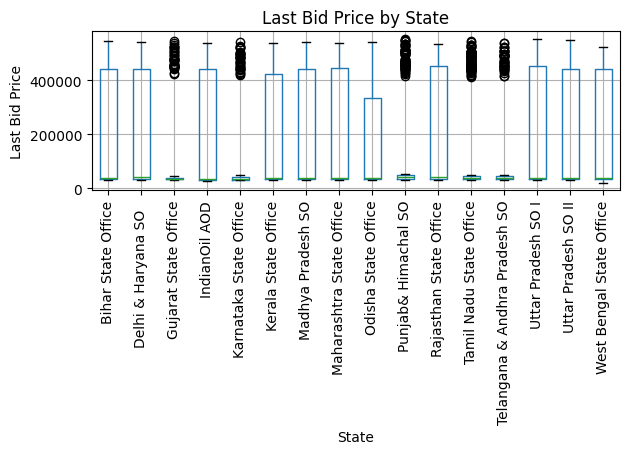

In [25]:

### **Step 1: Boxplot of Last Bid Price by State**
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
df.boxplot(column='last_bid_price', by='state', rot=90)
plt.title('Last Bid Price by State')
plt.suptitle('')
plt.xlabel('State')
plt.ylabel('Last Bid Price')
plt.tight_layout()
plt.show()

In [26]:
### **Step 2: Average Last Bid Price by State**


state_avg = df.groupby('state')['last_bid_price'].mean().sort_values(ascending=False)
print(state_avg)


state
Rajasthan State Office           189285.365854
Uttar Pradesh SO I               187691.194969
IndianOil AOD                    185857.500000
West Bengal State Office         170278.034682
Madhya Pradesh SO                169553.551913
Bihar State Office               162465.596330
Maharashtra State Office         161877.631579
Delhi & Haryana SO               159587.671233
Uttar Pradesh SO II              157024.313725
Odisha State Office              149825.925926
Kerala State Office              149501.550388
Punjab& Himachal SO              143414.141414
Tamil Nadu State Office          138560.753880
Telangana & Andhra Pradesh SO    134416.425121
Karnataka State Office           126551.871658
Gujarat State Office             103164.015152
Name: last_bid_price, dtype: float64


In [27]:
### **Step 3: Extract Year and Month from Auction Date**

df['auction_date'] = pd.to_datetime(df['auction_date'])
df['year'] = df['auction_date'].dt.year
df['month'] = df['auction_date'].dt.month

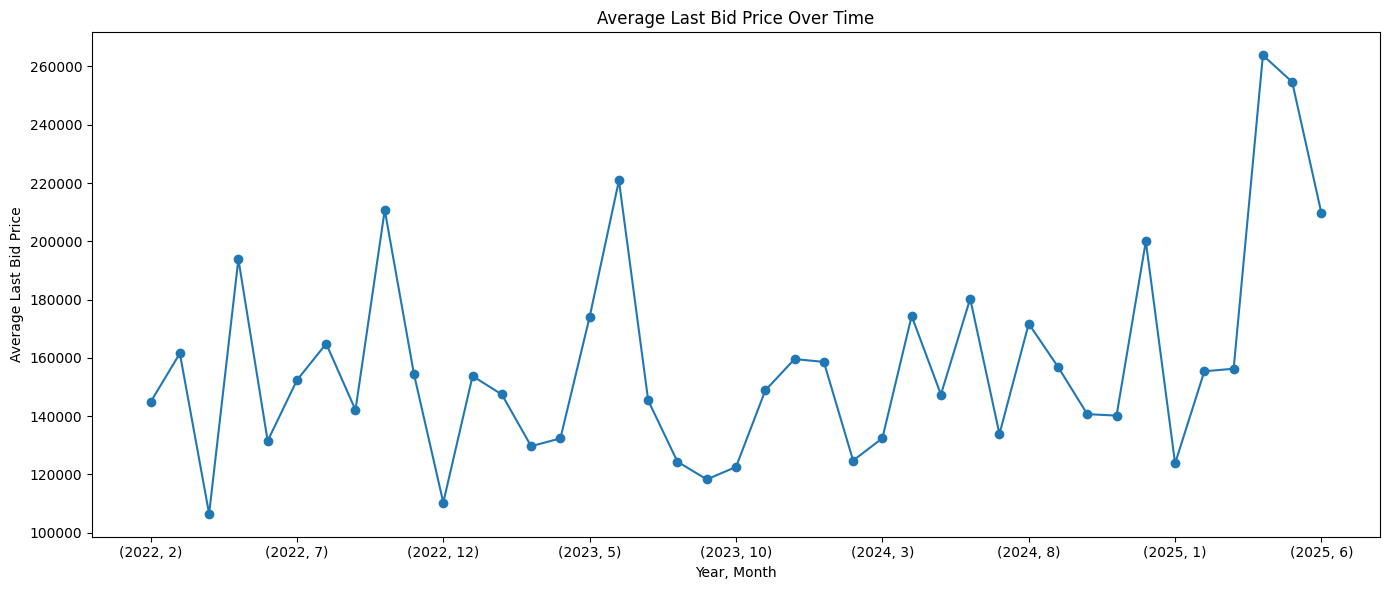

In [28]:
monthly_avg = df.groupby(['year', 'month'])['last_bid_price'].mean()
monthly_avg.plot(figsize=(14, 6), marker='o')
plt.title('Average Last Bid Price Over Time')
plt.xlabel('Year, Month')
plt.ylabel('Average Last Bid Price')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

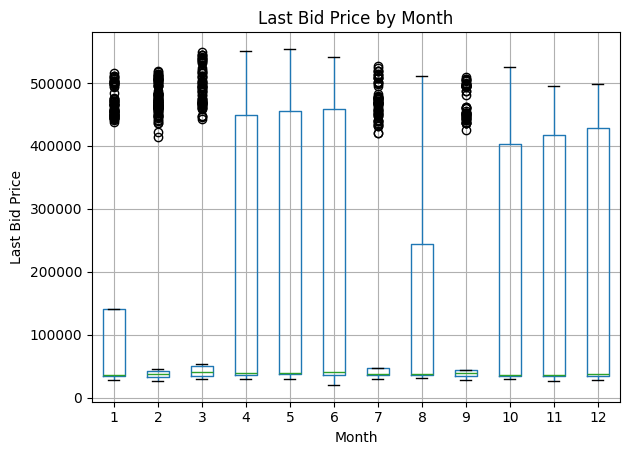

In [29]:
plt.figure(figsize=(10, 6))
df.boxplot(column='last_bid_price', by='month')
plt.title('Last Bid Price by Month')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Last Bid Price')
plt.tight_layout()
plt.show()

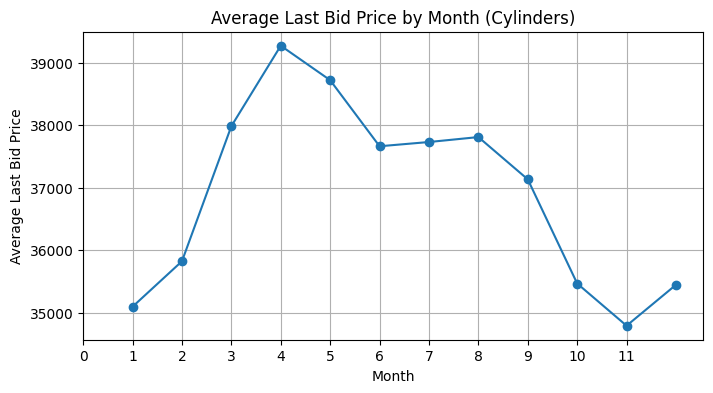

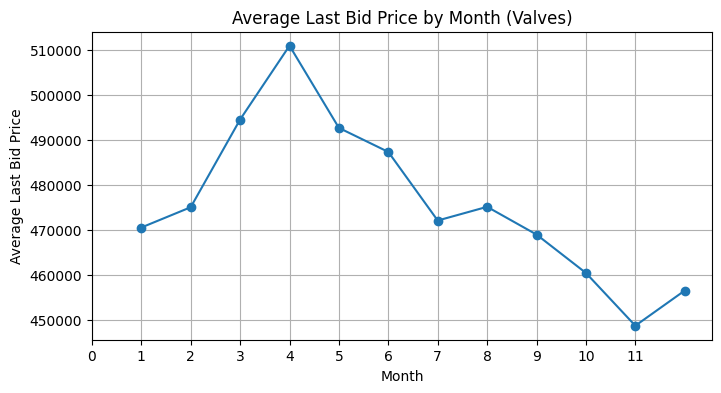

In [45]:


### **Step 1: Plot Average Price by Month for Each Product Group**


import matplotlib.pyplot as plt

for group in df['product_group'].unique():
    group_df = df[df['product_group'] == group]
    monthly_avg = group_df.groupby('month')['last_bid_price'].mean()
    plt.figure(figsize=(8, 4))
    monthly_avg.plot(marker='o')
    plt.title(f'Average Last Bid Price by Month ({group.capitalize()})')
    plt.xlabel('Month')
    plt.ylabel('Average Last Bid Price')
    plt.xticks(range(12))
    plt.grid(True)
    plt.show()




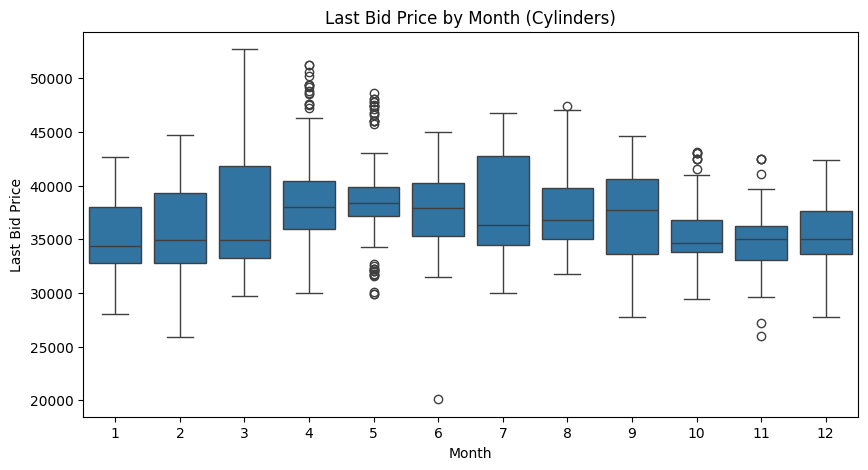

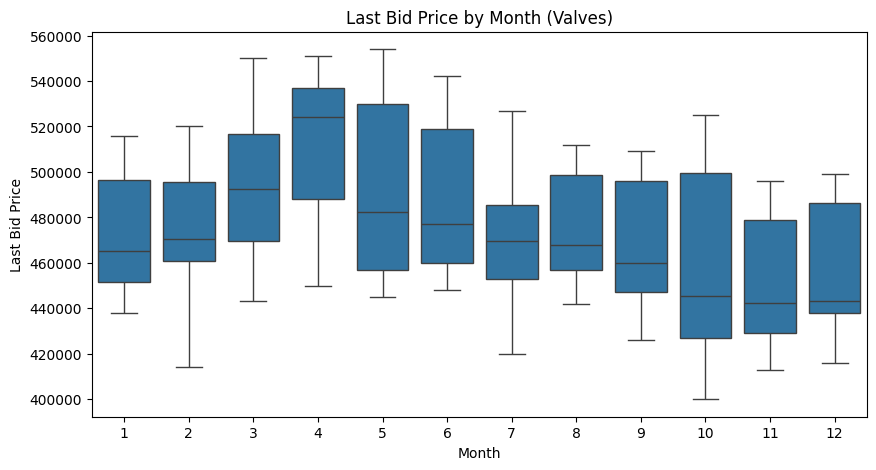

In [46]:


import seaborn as sns

for group in df['product_group'].unique():
    group_df = df[df['product_group'] == group]
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='month', y='last_bid_price', data=group_df)
    plt.title(f'Last Bid Price by Month ({group.capitalize()})')
    plt.xlabel('Month')
    plt.ylabel('Last Bid Price')
    plt.show()

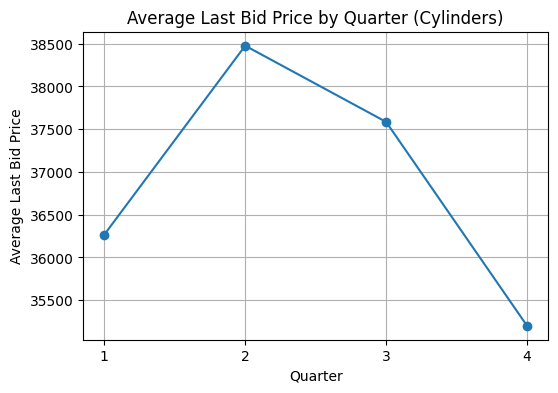

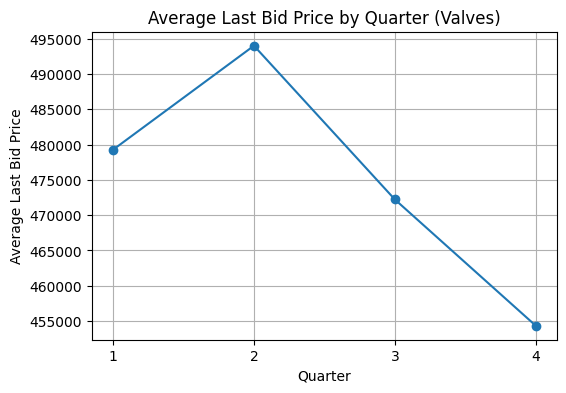

In [47]:
### **Step 3: (Optional) Plot by Quarter for Smoother Seasonality**


df['quarter'] = df['auction_date'].dt.quarter

for group in df['product_group'].unique():
    group_df = df[df['product_group'] == group]
    quarterly_avg = group_df.groupby('quarter')['last_bid_price'].mean()
    plt.figure(figsize=(6, 4))
    quarterly_avg.plot(marker='o')
    plt.title(f'Average Last Bid Price by Quarter ({group.capitalize()})')
    plt.xlabel('Quarter')
    plt.ylabel('Average Last Bid Price')
    plt.xticks([1, 2, 3, 4])
    plt.grid(True)
    plt.show()

## MERGING WITH MARKET DATA

### Loading the Engineered Market Data

In [30]:
import pandas as pd
market = pd.read_excel('../data/market_brass_poly.xlsx')


In [31]:
market.columns.tolist()

['date', 'brass_index_poly']

In [32]:

print("Auction: ", df['year_month_dt'].head())
print("Market: ",market['date'].head())
print(df['year_month_dt'].dtype)
print(market['date'].dtype)

Auction:  1482   2022-02-15
1483   2022-02-15
1484   2022-02-15
1343   2022-02-16
1380   2022-03-02
Name: year_month_dt, dtype: datetime64[ns]
Market:  0   2022-02-01
1   2022-02-01
2   2022-02-01
3   2022-02-01
4   2022-02-02
Name: date, dtype: datetime64[ns]
datetime64[ns]
datetime64[ns]


In [33]:
print("Auction data months:", df['year_month_dt'].unique()[:5])
print("Market data months:", market['date'].unique()[:5])


overlap = set(df['year_month_dt']).intersection(set(market['date']))
print(f"Number of overlapping months: {len(overlap)}")

Auction data months: <DatetimeArray>
['2022-02-15 00:00:00', '2022-02-16 00:00:00', '2022-03-02 00:00:00',
 '2022-03-03 00:00:00', '2022-03-16 00:00:00']
Length: 5, dtype: datetime64[ns]
Market data months: <DatetimeArray>
['2022-02-01 00:00:00', '2022-02-02 00:00:00', '2022-02-03 00:00:00',
 '2022-02-04 00:00:00', '2022-02-07 00:00:00']
Length: 5, dtype: datetime64[ns]
Number of overlapping months: 720


In [34]:
df = df.sort_values('auction_date')
market = market.sort_values('date')

# Use merge_asof to get the nearest (or previous) market data for each auction
merged_asof = pd.merge_asof(
    df,
    market,
    left_on='auction_date',
    right_on='date',
    direction='backward'  # or 'nearest' if you prefer
)

In [35]:
print(merged_asof[['auction_date', 'date', 'brass_index_poly']].head())
print("Null values: ",merged_asof['brass_index_poly'].isnull().sum())

  auction_date       date  brass_index_poly
0   2022-02-01 2022-02-01           613.820
1   2022-02-01 2022-02-01           613.820
2   2022-02-01 2022-02-01           613.820
3   2022-02-01 2022-02-01           613.820
4   2022-02-02 2022-02-02           620.845
Null values:  0


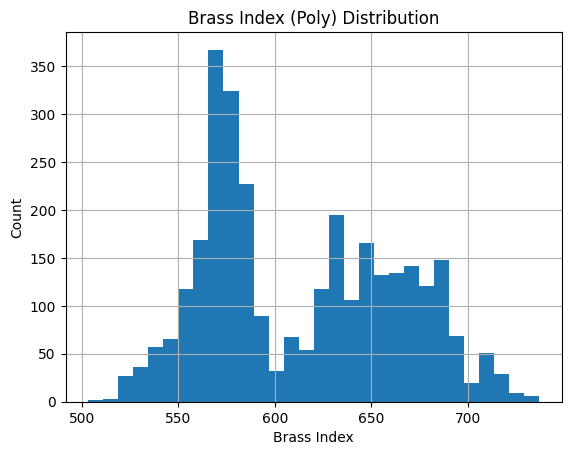

In [36]:
    import matplotlib.pyplot as plt
    merged_asof['brass_index_poly'].hist(bins=30)
    plt.title('Brass Index (Poly) Distribution')
    plt.xlabel('Brass Index')
    plt.ylabel('Count')
    plt.show()

In [37]:
merged_asof.columns.tolist()

['catalogue_no',
 'auction_date',
 'plant',
 'plant_code',
 'scode',
 'state',
 'h1_buyer_name',
 'proposed_rp',
 'quantity',
 'auctuom',
 'last_bid_price',
 'total_amt',
 'material_code',
 'productdescription',
 'product_group',
 'year',
 'month',
 'day',
 'year_month',
 'year_month_dt',
 'total_amt_calc',
 'ewm_last_bid_price',
 'ewm_proposed_rp',
 'ewm_quantity',
 'date',
 'brass_index_poly']

In [38]:
features_to_keep = [
    'year_month_dt', 'product_group', 'proposed_rp', 'last_bid_price', 'brass_index_poly', 'ewm_last_bid_price', 'ewm_proposed_rp', 'quantity', 'h1_buyer_name'
]


## SAVING

In [39]:
# merged_asof[features_to_keep].to_excel('../data/auctiondata_w_brass_index.xlsx', index=False)

In [40]:
# Example: Replace with your actual columns and descriptions
data_dict = pd.DataFrame([
    {'Variable': 'year_month_dt',     'Type': 'datetime64[ns]', 'Description': 'Date of the auction in datetimens[64] datatype format'},
    {'Variable': 'product_group',     'Type': 'str',            'Description': 'Product description grouped into cylinders and valves. Remaining were dropped'},
    {'Variable': 'proposed_rp',       'Type': 'float',          'Description': 'Reserved price set for the auction as per the main data'},
    {'Variable': 'last_bid_price',    'Type': 'float',          'Description': 'Final bid price in the auction as per the main data'},
    {'Variable': 'quantity',          'Type': 'int',            'Description': 'Quantity of product sold (UOM: MT)'},
    {'Variable': 'brass_index_poly',  'Type': 'float',          'Description': 'Brass index calculated using polynomial regression on the copper and zinc prices as per market data'},
   
])

In [41]:
print(data_dict.to_string(index=False))

        Variable           Type                                                                                         Description
   year_month_dt datetime64[ns]                                               Date of the auction in datetimens[64] datatype format
   product_group            str                       Product description grouped into cylinders and valves. Remaining were dropped
     proposed_rp          float                                             Reserved price set for the auction as per the main data
  last_bid_price          float                                                 Final bid price in the auction as per the main data
        quantity            int                                                                  Quantity of product sold (UOM: MT)
brass_index_poly          float Brass index calculated using polynomial regression on the copper and zinc prices as per market data


In [42]:
# # Convert to markdown
# def df_to_markdown(df):
#     header = '| ' + ' | '.join(df.columns) + ' |'
#     sep = '| ' + ' | '.join(['---']*len(df.columns)) + ' |'
#     rows = ['| ' + ' | '.join(str(x) for x in row) + ' |' for row in df.values]
#     return '\n'.join([header, sep] + rows)

# markdown_table = df_to_markdown(data_dict)

# # Save to file
# with open('../data_dictionary.md', 'w') as f:
#     f.write(markdown_table)

# # Also print markdown table
# print(markdown_table)